<a href="https://colab.research.google.com/github/BrunoCavagnaro/DiplomadoDSML/blob/master/Supervised_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Algorithms

In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import os
from graphviz import Source
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import roc_auc_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_circles, make_blobs
from sklearn.svm import SVR
from sklearn import datasets
from ipywidgets import interact, fixed

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#IMPORT DATASET
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
%cd '/content/gdrive/My Drive/Colab Notebooks/Diplomados_MLDS_Agraria/Supervised_ML_Algorithms/'

/content/gdrive/My Drive/Colab Notebooks/Diplomados_MLDS_Agraria/Supervised_ML_Algorithms


In [6]:
!ls

'Clase 4 -Arboles_clasificación.html'   iris.csv
'Clase 4 -Naive_Bayes.html'	       'S. Learning _ Clase 4.pdf'
'Clase 4 -SVM -.html'		        Supervised_Algorithms.ipynb


In [7]:
data = pd.read_csv('iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Naive Bayes

## Suport Vector Machines

### SVC

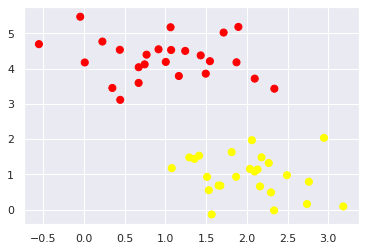

In [8]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")

In [9]:
model=SVC(kernel="linear", C = 1E10) #C = 1E10
model.fit(X,Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


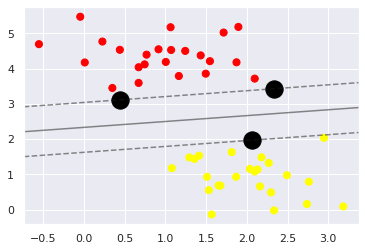

In [12]:
#PLOT SUPPORT (PINTAR EL SOPORTE)
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    #COMBINANDO LOS PUNTOS
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "Black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
#pintar los soportes vectoriales
plt_svc(model, plot_support=True)

In [13]:
X, Y = make_circles(100, factor = .1, noise = .1) 
rbf = SVC(kernel='rbf', C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[ 0.90027182  0.15634235]
 [-0.63377301  0.4562899 ]
 [ 0.76676418  0.51996035]
 [ 0.64329253 -0.68307851]
 [ 0.13162876 -0.89579173]
 [-0.51805808 -0.64699195]
 [-0.06217018  0.79361267]
 [-0.23066355  0.2435576 ]
 [ 0.01762962 -0.27854521]]


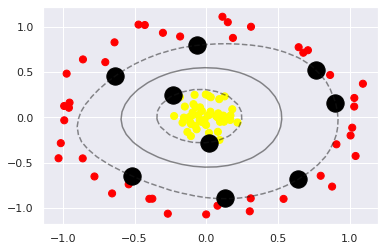

In [14]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
#pintar los soportes vectoriales
plt_svc(rbf, plot_support=True)

In [16]:
data['Species'] = pd.factorize(data["Species"])[0]
X = data.iloc[0:,0:2].to_numpy()
Y = data.Species.to_numpy()

In [17]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

In [25]:
C = 1.0 #STANDAR MAS GRANDE MAS RESTRIC MAS BAJA MAS LAXA
svc_linear = SVC(kernel="linear", C=C).fit(X,Y)
Ypred_linear = svc_linear.predict(X_plot)
Ypred_linear = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

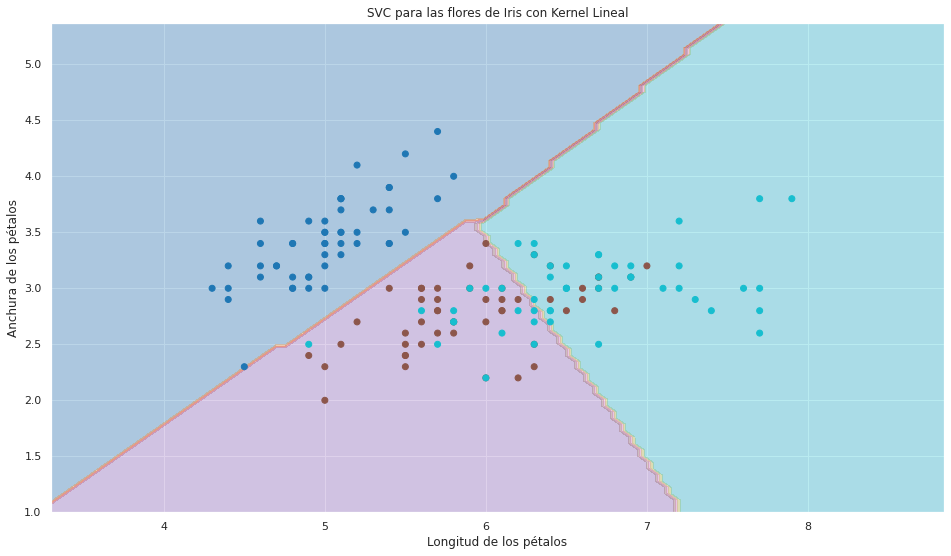

In [26]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred_linear, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1],c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

In [27]:
#RBF:
C = 1.0 #STANDAR MAS GRANDE MAS RESTRIC MAS BAJA MAS LAXA
svc_rbf = SVC(kernel="rbf", C=C).fit(X,Y)
Ypred_rbf = svc_rbf.predict(X_plot)
Ypred_rbf = Ypred_rbf.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel RBF')

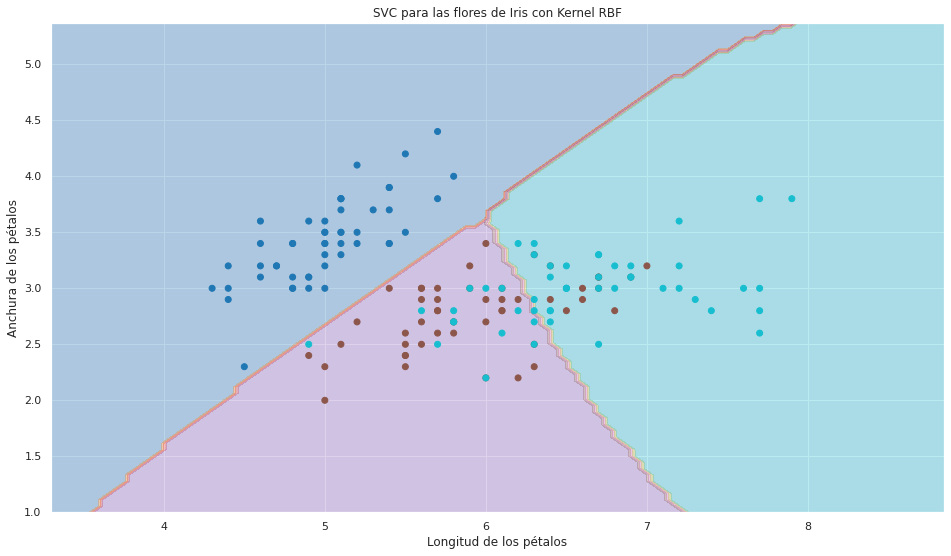

In [28]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred_rbf, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1],c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel RBF")

In [30]:
#POLY:
C = 1.0 #STANDAR MAS GRANDE MAS RESTRIC MAS BAJA MAS LAXA
svc_poly = SVC(kernel="poly", C=C).fit(X,Y)
Ypred_poly = svc_poly.predict(X_plot)
Ypred_poly = Ypred_poly.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Polinomial')

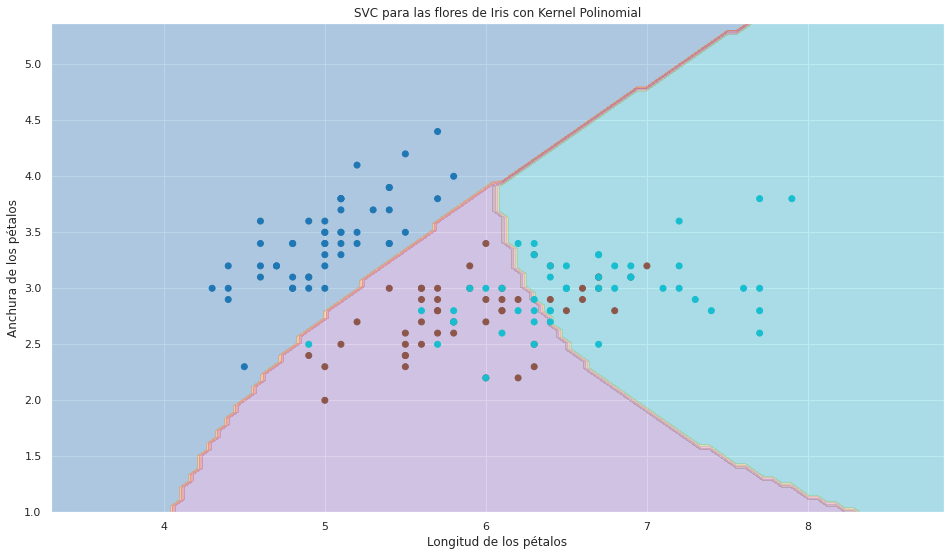

In [32]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred_poly, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1],c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Polinomial")

In [33]:
#Sigmoid:
C = 1.0 #STANDAR MAS GRANDE MAS RESTRIC MAS BAJA MAS LAXA
svc_sigmoid = SVC(kernel="sigmoid", C=C).fit(X,Y)
Ypred_sigmoid = svc_sigmoid.predict(X_plot)
Ypred_sigmoid = Ypred_sigmoid.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoidal')

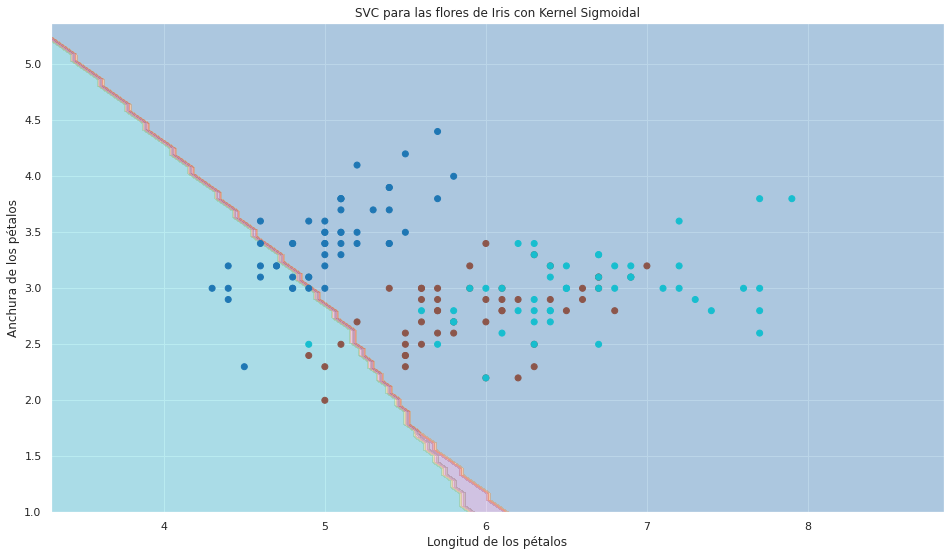

In [34]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred_sigmoid, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1],c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Sigmoidal")

In [36]:
X2 = data.iloc[0:,0:4].to_numpy()
Y2 = data.Species.to_numpy()
Y2.shape

(150,)

In [44]:
C = 1.0
svc = SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X2,Y2)
Ypred = svc.predict(X2)

In [45]:
dat1=pd.DataFrame(data=Ypred, columns = ['Ypred'])
dat1.head()
dat2=pd.DataFrame(data=Y2, columns = ['Yreal'])

In [46]:
final=pd.concat([dat1, dat2], axis=1)
final

,Ypred,Yreal
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


In [47]:
confusion_matrix = pd.crosstab(final.Yreal,final.Ypred)
confusion_matrix

Ypred,0,1,2
Yreal,,,
0,50,0,0
1,0,48,2
2,0,2,48


In [48]:
svc.score(X2,Y2) # 100% 

0.9733333333333334

### SVR

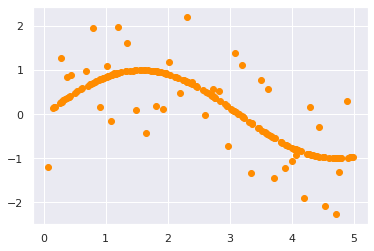

In [49]:
X = np.sort(5*np.random.rand(200,1),axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3*(0.5 - np.random.rand(40))
plt.scatter(X,Y, color="darkorange", label="data")

In [50]:
C=1e3
svr_lin = SVR(kernel="linear", C=C)
svr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)
svr_pol = SVR(kernel="poly", C=C, degree=3)

In [52]:
y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

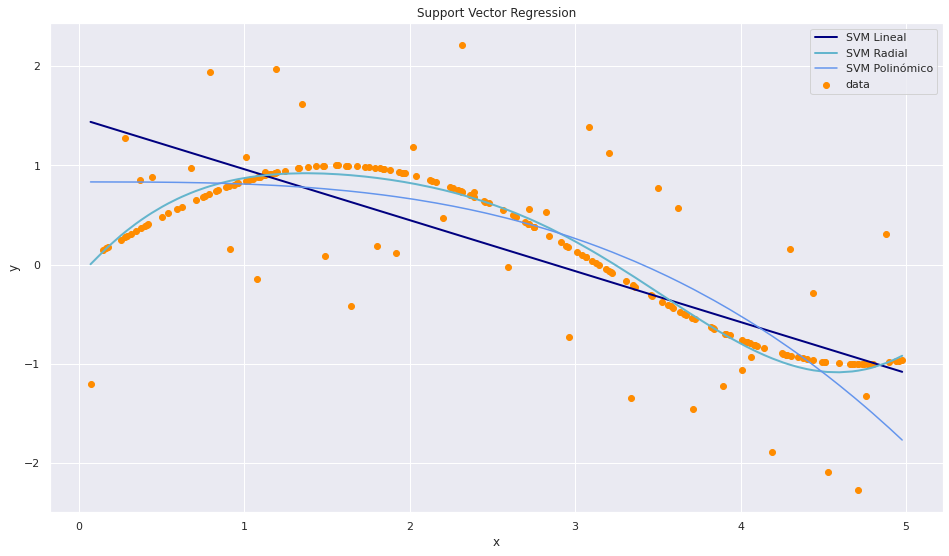

In [53]:
lw = 2
plt.figure(figsize=(16,9))
plt.scatter(X,Y,color="darkorange", label ="data")
plt.plot(X,y_lin, color="navy", lw = lw, label = "SVM Lineal")
plt.plot(X,y_rbf, color="c", lw=lw, label="SVM Radial")
plt.plot(X,y_pol, color="cornflowerblue", label="SVM Polinómico")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

## Decision Trees

### ID3 - Entropy

In [54]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]
X=data[predictors]
Y=data[target]

In [55]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,
                                           random_state=8)

In [56]:
tree_f = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99,min_samples_leaf=5)
tree_f.fit(Xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [57]:
preds = tree_f.predict(Xtest)

In [58]:
pd.crosstab(ytest, preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,0,1,2
Actual,,,
0,13,0,0
1,0,11,1
2,0,4,9


In [59]:
# La profundidad máxima del árbol
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = 5
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    #print("   ",tree.feature_importances_)

Score para i =  1  es de  0.6666666666666666
Score para i =  2  es de  0.9333333333333332
Score para i =  3  es de  0.96
Score para i =  4  es de  0.96
Score para i =  5  es de  0.96
Score para i =  6  es de  0.96
Score para i =  7  es de  0.96
Score para i =  8  es de  0.96
Score para i =  9  es de  0.96
Score para i =  10  es de  0.96


### Random Forrest

In [60]:
rf_cl=RandomForestClassifier(max_depth=15,n_estimators=10,random_state=4) # Objeto
rf_cl.fit(Xtrain,ytrain) # Entrenamiento

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [61]:
# Precisión
print(rf_cl.score(Xtrain,ytrain))
print(rf_cl.score(Xtest,ytest))

0.9821428571428571
0.868421052631579


### XGBoost

In [65]:
xgboost = xgb.XGBClassifier(objective='binary:logistic', max_depth=15, n_estimators=10, seed=4)
xgboost.fit(Xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=4,
              silent=None, subsample=1, verbosity=1)

In [66]:
print(xgboost.score(Xtrain, ytrain))
print(xgboost.score(Xtest, ytest))

0.9910714285714286
0.868421052631579


In [67]:
a = xgboost
print(a.score(Xtrain, ytrain))

0.9910714285714286


## Ejercicio

In [102]:
def ensemble_boosting(Xtrain, Xtest, ytrain, ytest, max_depth=15, n_estimators=10):
  from sklearn.ensemble import RandomForestClassifier
  import xgboost as xgb
  rf=RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators,random_state=4) # Objeto
  rf.fit(Xtrain,ytrain) # Entrenamiento
  rf_score = rf.score(Xtest,ytest)
  xgboost = xgb.XGBClassifier(objective='binary:logistic', max_depth=max_depth, n_estimators=n_estimators, seed=4)
  xgboost.fit(Xtrain, ytrain)
  xgboost_score = xgboost.score(Xtest, ytest)
  if (rf_score > xgboost_score):
    model = rf
  else:
    model = xgboost
  return model

In [98]:
def decision_tree(Xtrain, Xtest, ytrain, ytest, max_depth = 10):
  f_score = 0
  for i in range(1,max_depth+1):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(Xtrain,ytrain)
    cv = 5
    scores = cross_val_score(tree, Xtrain, ytrain, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    if (score > f_score):
      f_score = score
      model = tree
  
  return model

In [105]:
def naive_bayes(Xtrain, Xtest, ytrain, ytest):
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.naive_bayes import BernoulliNB
  from sklearn.naive_bayes import GaussianNB
  nai_1 = GaussianNB()
  # Train classifier
  nai_1.fit(Xtrain,ytrain)
  nai_1_score = nai_1.score(Xtest, ytest)
  nai_2 = BernoulliNB()
  # Train classifier
  nai_2.fit(Xtrain,ytrain)
  nai_2_score = nai_1.score(Xtest, ytest)
  nai_3 = MultinomialNB()
  # Train classifier
  nai_3.fit(Xtrain,ytrain)
  nai_3_score = nai_1.score(Xtest, ytest)
  score = nai_1_score
  model = nai_1
  if (nai_2_score > score):
    score = nai_2_score
    model = nai_2
  
  if (nai_3_score > score):
    score = nai_3_score
    model = nai_3

  return model 


In [112]:
def classifier_models(data):
  """
  Preprocesamiento:  
  """
  data['gastos']=(data['gastos_comunes']+data['gastos_otros']+data['pago_coche'])
  data['financiar']=data['vivienda']-data['ahorros']
  data.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1).head(10)
  
  from sklearn.feature_selection import SelectKBest
  X=data.drop(['comprar'], axis=1)
  y=data['comprar']
  best=SelectKBest(k=5)
  best.fit_transform(X, y)
  selected = best.get_support(indices=True)
  used_features =X.columns[selected]
  """
  Modelamiento:  
  """
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import roc_auc_score
  Xtrain,Xtest,ytrain,ytest=train_test_split(X[used_features],y,test_size=0.25,random_state=8)
  #Decision Tree:
  decision_tree_model = decision_tree(Xtrain, Xtest, ytrain, ytest)
  print('DECISION TREE MODEL METRICS:')
  print(' Accuracy: '+ str(decision_tree_model.score(Xtest, ytest)))
  print(' Gini_train: ' + str(2*roc_auc_score(ytrain,decision_tree_model.predict_proba(Xtrain)[:,1])-1)) 
  print(' Gini_test: ' + str(2*roc_auc_score(ytest,decision_tree_model.predict_proba(Xtest)[:,1])-1))
  #Ensemble_XGBoost:
  ensemble_boosting_model = ensemble_boosting(Xtrain, Xtest, ytrain, ytest)
  print('ENSEMBLE AND BOOSTING MODEL METRICS:')
  print(' Accuracy: '+ str(ensemble_boosting_model.score(Xtest, ytest)))
  print(' Gini_train: '+ str(2*roc_auc_score(ytrain,ensemble_boosting_model.predict_proba(Xtrain)[:,1])-1)) 
  print(' Gini_test: '+ str(2*roc_auc_score(ytest,ensemble_boosting_model.predict_proba(Xtest)[:,1])-1))
  #Naive Bayes:
  naive_bayes_model = naive_bayes(Xtrain, Xtest, ytrain, ytest)
  print('NAIVE BAYES MODEL METRICS:')
  print(' Accuracy: '+ str(naive_bayes_model.score(Xtest, ytest)))
  print(' Gini_train: '+ str(2*roc_auc_score(ytrain,naive_bayes_model.predict_proba(Xtrain)[:,1])-1)) 
  print(' Gini_test: '+ str(2*roc_auc_score(ytest,naive_bayes_model.predict_proba(Xtest)[:,1])-1))
  return decision_tree_model, ensemble_boosting_model, naive_bayes_model 

In [78]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
%cd '/content/gdrive/My Drive/Colab Notebooks/Diplomados_MLDS_Agraria/Supervised_ML_Algorithms/'

/content/gdrive/My Drive/Colab Notebooks/Diplomados_MLDS_Agraria/Supervised_ML_Algorithms


In [80]:
!ls

'Clase 4 -Arboles_clasificación.html'   iris.csv
'Clase 4 -Naive_Bayes.html'	       'S. Learning _ Clase 4.pdf'
'Clase 4 -SVM -.html'		        Supervised_Algorithms.ipynb
 comprar_alquilar.csv


In [81]:
data_2 = pd.read_csv('comprar_alquilar.csv')

In [113]:
decision_tree_model, ensemble_boosting_model, naive_bayes_model = classifier_models(data_2)

DECISION TREE MODEL METRICS:
 Accuracy: 0.803921568627451
 Gini_train: 0.8930889652539138
 Gini_test: 0.548582995951417
ENSEMBLE AND BOOSTING MODEL METRICS:
 Accuracy: 0.9215686274509803
 Gini_train: 0.9998090874379537
 Gini_test: 0.8724696356275303
NAIVE BAYES MODEL METRICS:
 Accuracy: 0.8431372549019608
 Gini_train: 0.8400152730049637
 Gini_test: 0.7530364372469636
